# Part II - (Student Performance in Exams)
## by (Jennifer Ashishali Ochonogor)

## Investigation Overview

In this part of the project, a slide deck will be used for explanatory data visualizations that tells a story about the data exploration in Part I. The questions raised in the exploration phase have been answered as stated below, and polished plots will be rendered so that they can be presented in an understandable form.

**Key Insights on Questions**
- In comparing the test preparations across the parent's education level, and ethnic group A, which is associated with a high rate of completing preparation courses, we have been able to measure how effective test preparation courses are by the notable difference in test scores seen across each group.

- We have also uncovered some determining factors of test outcomes. We know that subject plays a role by the distribution of scores in math to reading and writing based on the gender of the student. Socio-Economic factors like Lunch plan, which measures the household income of each student, Parent Level of Education which accounts for family environment and support, and Ethnicity which measures school support in minority represented groups are key factors in test scores. 

 
## Dataset Overview

The data explored is a fictional dataset sourced from [Kaggle](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?resource=download) which consists of the marks secured by students in various subjects.The dataset contains 24000 values representing 8 variables and 3000 observations. The variables are:

> - id, unique identifier for each student
> - gender, with two possible values (male and female).
> - ethnicity, with five possible values (group A, group B, group C, group D, and group E).
> - parent_education, with six possible values (some high school, high school, some college, associate's degree, bachelor's degree, and master's degree).
> - lunch, with two possible values (standard and free/reduced)
> - test_prep, with two possible values (completed and none)
> - subject, with three possible values (math, writing, and reading)
> - score, with a range of values for each subject


Main feature of interest is the test outcome of each subject, *score*. Other supporting features are test preparations, gender and socio-economic factors like eligible lunch program, parental level of education, and ethnicity.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import webcolors

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
test_clean = pd.read_csv('test_clean.csv')

## How effective is the test preparation course?

### Test Preparation by Ethnicity

We compared test preparations to test scores, and gleaned the group most associated with completed test preparations. We found that students from the least represented ethnic group, group A had an engagement of approximately 41% , which is comparatively higher compared to the other ethnic groups. 

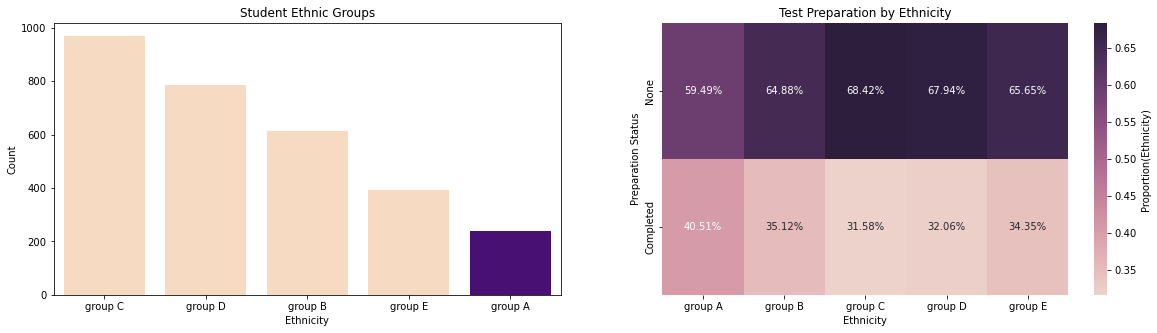

In [3]:
# create table to plot test preparations by ethnicity 
df3 = pd.DataFrame({'ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'] , 'none' : [141, 399, 663, 534, 258], 'completed' : [96, 216, 306, 252, 135]}).set_index('ethnicity')

# calculate for proportions
df3['sum'] = df3['none'] + df3['completed']
df3['None'] = df3['none']/df3['sum']
df3['Completed'] = df3['completed']/df3['sum']

# drop columns not needed and transpose dataframe
df3.drop(['none', 'completed', 'sum'], axis = 1, inplace = True)
df3 = df3.transpose() # to place the Lunch Plan on the x-axis

# plot
plt.figure(figsize = [20,5])
# ethnicity distribution
plt.subplot(1,2,1)
freq_e = test_clean.ethnicity.value_counts().index
colors = ['peachpuff', 'peachpuff', 'peachpuff', 'peachpuff', 'indigo']
sb.countplot(data = test_clean, x = 'ethnicity', palette = colors, order = freq_e)
plt.title('Student Ethnic Groups')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# test prep in ethnicity
plt.subplot(1,2,2)
sb.heatmap(df3, annot = True , fmt = '.2%', cmap=sb.cubehelix_palette(as_cmap=True), cbar_kws = {'label' : 'Proportion(Ethnicity)'})
plt.title('Test Preparation by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Preparation Status');

### Distribution of Test Scores on Ethnicity by Test Preparations

An interaction of each ethnic group with test preparations and its effect on test scores was further investigated. The ethhnic groups are ordered in decreasing popularity. We can see the median scores for completed test preparations are higher with each ethnic group compared to no test preparations. Also, the height of the IQR for group A is comparatively shorter in completed preparations than in no preparations. This suggests that students in group A for completed test preparation courses have a higher level of agreement in scores compared to the group A in no test preparations.

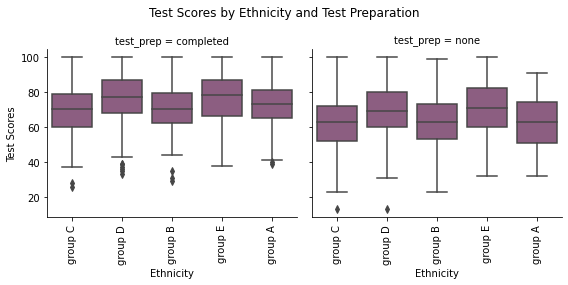

In [4]:
color = sb.cubehelix_palette()[3]
ethnic_pop = ['group C', 'group D', 'group B', 'group E', 'group A']
g = sb.FacetGrid(data = test_clean, col = 'test_prep', height = 4)
g.map(sb.boxplot, 'ethnicity', 'score', order = ethnic_pop, color = color)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Test Scores by Ethnicity and Test Preparation')
g.axes[0,0].set_xlabel('Ethnicity')
g.axes[0,1].set_xlabel('Ethnicity')
g.axes[0,0].set_ylabel('Test Scores')
# rotate tick labels
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout();

### Socio-Economic Measures on Test Scores by Status of Preparation

We also compared the other two socio-economic factors; lunch plan and parent education with test preparation, to see the distribution in test scores, it was observed that although the test scores increased with a consistent rise of these factors, students who completed the preparatory course across these factors, obtained higher scores than students without a test preparatory course

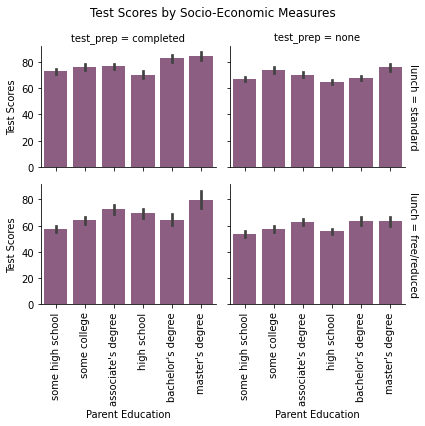

In [5]:
# plot chart
color = sb.cubehelix_palette()[3]
g = sb.FacetGrid(data = test_clean, col = 'test_prep', row = 'lunch', margin_titles = True)
g.map(sb.barplot, 'parent_education', 'score', color = color)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Test Scores by Socio-Economic Measures')
g.axes[1,0].set_xlabel('Parent Education')
g.axes[1,1].set_xlabel('Parent Education')
g.axes[0,0].set_ylabel('Test Scores')
g.axes[1,0].set_ylabel('Test Scores')
# rotate tick labels
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout();

## Which major factors contribute to test outcomes?

### Test Scores by Gender

We know that subject plays a role by the distribution of scores in math to reading and writing based on the gender of the student. The box plot below shows the variation of test scores for both genders based on the median, we can observe that female students excel more in Reading and Writing, while male students excel more at Math.

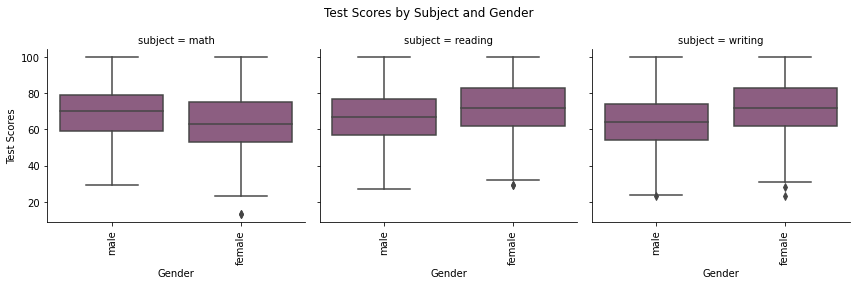

In [6]:
g = sb.FacetGrid(data = test_clean, col = 'subject', height = 4)
g.map(sb.boxplot, 'gender', 'score', color = color)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Test Scores by Subject and Gender')
g.axes[0,0].set_xlabel('Gender')
g.axes[0,1].set_xlabel('Gender')
g.axes[0,2].set_xlabel('Gender')
g.axes[0,0].set_ylabel('Test Scores')
# rotate tick labels
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout();

### Socio-Economic Measures on Test Scores

Also, socio-Economic factors like Lunch plan, which measures the household income of each student and Parent Level of Education which accounts for family environment and support, are key factors in test scores. In the violin plot, the median score for students with a standard lunch plan are notably higher than students eligible for free/reduced lunch plan. We can also observe the distribution of points at the highest scores are denser for standard than free/reduced plan. In the box plot adjacent to it, there's an increasing consistency in test scores as the parent level of education advances.

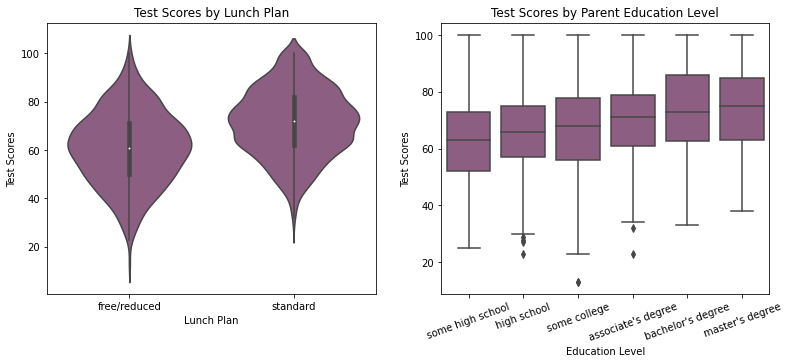

In [7]:
plt.figure(figsize = [20, 5])

# 1st feature
plt.subplot(1,3,1)
order = ['free/reduced', 'standard']
sb.violinplot(data = test_clean, x = 'lunch', y = 'score', color = color, order = order)
plt.title('Test Scores by Lunch Plan')
plt.xlabel('Lunch Plan')
plt.ylabel('Test Scores')

# 2nd feature
plt.subplot(1,3,2)
categories = ['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"]
sb.boxplot(data = test_clean, x = 'parent_education', y = 'score', color = color, order = categories)
plt.xticks(rotation = 20)
plt.title('Test Scores by Parent Education Level')
plt.xlabel('Education Level')
plt.ylabel('Test Scores');

## To answer the last question: What would be the best way to improve student scores on each test?

Based on the data, to improve the test scores for students, I will suggest an increase in the engagement of test preparation courses, particularly on the subject each gender is shown to be weaker at, and an introduction of school related motivational and engagement activities targeted at students with low parental education background.

## Thank You

In [8]:
!jupyter nbconvert students_performance_in_exams_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook students_performance_in_exams_Part2.ipynb to slides
[NbConvertApp] Writing 588317 bytes to students_performance_in_exams_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Administrator\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Administrator\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Administrator\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in conv